In [33]:
import numpy as np
import xarray as xr
import os, os.path
import glob
from cartopy import crs as ccrs
from cartopy import feature
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from io_util import set_output_dir
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import calendar
import increments as inc
import importlib
importlib.reload(inc)

work_dir="/work/Feiyu.Lu/"
inc_dir=work_dir+"increments/"
ecda_dir="/archive/Feiyu.Lu/SPEAR/SPEAR_c96_o1_ECDA_"
    
static_file='/work/Feiyu.Lu/SPEAR/ocean_z.static.nc'
static_ds=xr.open_dataset(static_file)
area_t=static_ds.area_t.where(static_ds.wet)
area=static_ds.areacello
geolat=static_ds.geolat
geolon=static_ds.geolon

/home/Feiyu.Lu/Documents/SPEAR_ECDA/increments/H64


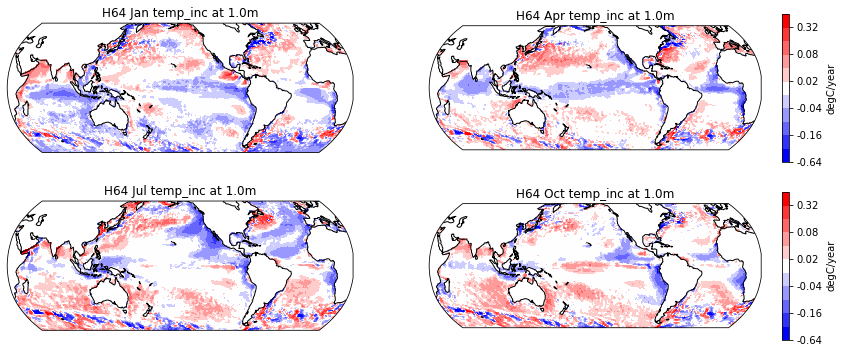

In [35]:
# fig,axes=inc.annual_mean_latlon_plot('temp','Global_60','H64',[1,20],clim=0.32)
fig,axes=inc.annual_cycle_latlon_plot('temp','Global_60','H64',1,months=[1,4,7,10],offset=1,clim=0.64)
# fig,axes=inc.annual_mean_latlon_diff_plot('temp','Global_60','H85','H64',[10,50,200],offset=2)
# fig,axes=inc.annual_cycle_latlon_diff_plot('temp','TropPac','H85','H64',100,offset=2)
# fig,axes=inc.annual_cycle_depthlon_plot('temp','TropPac','H64',slice(0,500))

# fig,axes=inc.annual_cycle_depth_plot('temp','Nino3','H64',slice(0,500))

In [2]:
# Modify increments for OTA
mean_file="inc."+exp_name+".2007-2018.mean.nc"
mean_ds=xr.open_dataset(inc_dir+exp_name+"/"+mean_file)
cycle_file="inc."+exp_name+".2007-2018.raw.nc"
cycle_ds=xr.open_dataset(inc_dir+exp_name+"/"+cycle_file)

new_mean_ds=mean_ds
new_cycle_ds=cycle_ds
lon = new_mean_ds.coords['xh']
lat = new_mean_ds.coords['yh']

# lats=slice(60,90)
# clim=1.0E-6
# cmap='bwr'
# depth_index=0
# month_index=7
# # fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6), subplot_kw={'projection': ccrs.NorthPolarStereo(0)})
# # ch1=axes[0].pcolormesh(geolon.sel(yh=lats),geolat.sel(yh=lats),
# #                    new_cycle_ds.temp_increment.sel(yh=lats).isel(z_l=depth_index,time=month_index).squeeze(),
# #                    vmin=-clim, vmax=clim,cmap=cmap,transform=ccrs.PlateCarree())
# # plt.colorbar(ch1,ax=axes[0])

# wts1=geolat*0
# # fig1,axes1 = plt.subplots(nrows=1, ncols=2, figsize=(15,6), subplot_kw={'projection': ccrs.NorthPolarStereo(0)})
# # axes1[0].pcolormesh(geolon.sel(yh=lats),geolat.sel(yh=lats),wts.sel(yh=lats),
# #                     vmin=0, vmax=1,cmap=cmap,transform=ccrs.PlateCarree())

# zero_box=[75,80,-105,-90]
# wts1=wts1.where(geolat>zero_box[0],1).where(geolat<zero_box[1],1).where(geolon>zero_box[2],1).where(geolon<zero_box[3],1)
# # axes1[1].pcolormesh(geolon.sel(yh=lats),geolat.sel(yh=lats),wts.sel(yh=lats),
# #                     vmin=0, vmax=1,cmap=cmap,transform=ccrs.PlateCarree())

# for var in ['temp','salt']:
#     new_mean_ds[var+'_increment'] = new_mean_ds[var+'_increment']*wts1
#     new_cycle_ds[var+'_increment'] = new_cycle_ds[var+'_increment']*wts1
    
# rlat=75
# wts2=geolat.where(geolat<rlat,(80-geolat)/(80-rlat))
# wts2=wts2.where(wts2>0,0)
# wts2=wts2.where(geolat>rlat,1)
# for var in ['temp','salt']:
#     new_mean_ds[var+'_increment'] = new_mean_ds[var+'_increment']*wts2
#     new_cycle_ds[var+'_increment'] = new_cycle_ds[var+'_increment']*wts2

# print(new_cycle_ds)

# ch2=axes[1].pcolormesh(geolon.sel(yh=lats),geolat.sel(yh=lats),
#                    new_cycle_ds.temp_increment.sel(yh=lats).isel(z_l=depth_index,time=month_index).squeeze(),
#                    vmin=-clim, vmax=clim,cmap=cmap,transform=ccrs.PlateCarree())
# plt.colorbar(ch2,ax=axes[1])
# for ax in axes.flat:
#     ax.coastlines()
#     ax.add_feature(feature.LAND)

In [3]:
##### Make integral of increments zero 
# H62 2007-2018
# temp_adj=3.2030379325376731E-9/thickness
# salt_adj=-1.1784019696830057E-10/thickness

# H54 2007-2018
# temp_adj=2.296299838194909E-9/thickness
# salt_adj=-2.590293581572429E-10/thickness

# H54 2007-2018
# temp_adj=1.202823007236333E-8/thickness/thickness
# salt_adj=-1.2868351382143708E-9/thickness/thickness

# H54 2007-2018 no polar removal
# temp_adj=1.18832621315819E-8/thickness/thickness
# salt_adj=-1.891575409180896E-9/thickness/thickness

# H51 2007-2018
# temp_adj=2.5574063294300588E-7/thickness/thickness
# salt_adj=-1.2913405685385E-9/thickness/thickness

# H64 2007-2018 no polar removal
# temp_adj=1.6317745E-8/thickness/thickness
# salt_adj=-0.8241752E-9/thickness/thickness

# K02 2007-2018
# temp_adj=1.28998745E-8/thickness/thickness
# salt_adj=-0.70674507E-9/thickness/thickness

# K03 2007-2018
# temp_adj=-1.67906704E-8/thickness/thickness
# salt_adj=-0.77721061E-9/thickness/thickness

# H79 2007-2018
# temp_adj=1.840238140E-8/thickness/thickness
# salt_adj=-0.827647393E-9/thickness/thickness

# H81 2007-2018
# temp_adj=0.99747434E-8/thickness/thickness
# salt_adj=-0.86273489E-9/thickness/thickness

# H82 2007-2018
# temp_adj=0.8141598E-8/thickness/thickness
# salt_adj=-0.9026199E-9/thickness/thickness

# H85 2007-2018
# temp_adj=2.27468372E-8/thickness/thickness
# salt_adj=-0.61743802E-9/thickness/thickness

# H86 2007-2018
# temp_adj=2.002715047E-8/thickness/thickness
# salt_adj=-0.58590997E-9/thickness/thickness

# H87 2007-2018
# temp_adj=1.861263367E-8/thickness/thickness
# salt_adj=-0.592410238E-9/thickness/thickness

# H88 2007-2018
# temp_adj=1.733355833E-8/thickness/thickness
# salt_adj=-0.603098851E-9/thickness/thickness

# M02 2007-2018
temp_adj=2.1472974557E-8/thickness/thickness
salt_adj=-0.8331946868E-9/thickness/thickness

new_temp=new_mean_ds['temp_increment'].copy(deep=True)
print(((new_temp*area_t).sum(('xh','yh'))*thickness.data).sum())
new_temp.data=new_temp.data+np.float32(temp_adj.data[None,:,None,None])
print(((new_temp*area_t).sum(('xh','yh'))*thickness.data).sum())

new_salt=new_mean_ds['salt_increment'].copy(deep=True)
print(((new_salt*area_t).sum(('xh','yh'))*thickness.data).sum())
new_salt.data=new_salt.data+np.float32(salt_adj.data[None,:,None,None])
print(((new_salt*area_t).sum(('xh','yh'))*thickness.data).sum())

adj_cycle_ds=new_cycle_ds.copy(deep=True)
adj_cycle_ds['salt_increment'].data=adj_cycle_ds['salt_increment'].data+np.float32(salt_adj.data[None,:,None,None])
adj_cycle_ds['temp_increment'].data=adj_cycle_ds['temp_increment'].data+np.float32(temp_adj.data[None,:,None,None])
# print(adj_cycle_ds)

<xarray.DataArray ()>
array(-91408384.35839522)
<xarray.DataArray ()>
array(0.59762502)
<xarray.DataArray ()>
array(3546829.59615147)
<xarray.DataArray ()>
array(-0.09497566)


In [6]:
print(88518450.24037008/(88518450.24037008-45949425.94600077))
print(2939398.01080541/(2939398.01080541+1317505.46893695))

2.079409892701689
0.6905014466015826


In [ ]:
interp_temp=scipy.interpolate.griddata((geolat.stack(loc=('xh','yh')), geolon.stack(loc=('xh','yh'))),
                                       adj_cycle_ds['temp_increment'].stack(loc=('xh','yh')).T,(yh, xh))
temp_inc=xr.DataArray(np.float32(interp_temp), coords=[ocean_static_ds.yh, ocean_static_ds.xh, adj_cycle_ds.z_l, adj_cycle_ds.time])

# temp_raw=adj_cycle_ds['temp_increment']
# interp_temp=scipy.interpolate.griddata((geolat.data.flatten(), geolon.data.flatten()),
#                                        temp_raw.data.reshape(temp_raw.shape[0]*temp_raw.shape[1],-1).T,(yh, xh))
# temp_inc=xr.DataArray(np.float32(interp_temp.reshape(interp_temp.shape[0],interp_temp.shape[1],temp_raw.shape[0],temp_raw.shape[1])), 
#                       coords=[ocean_static_ds.yh, ocean_static_ds.xh, adj_cycle_ds.time, adj_cycle_ds.z_l])

temp_inc=temp_inc.transpose('time','z_l','yh','xh')

interp_salt=scipy.interpolate.griddata((geolat.stack(loc=('xh','yh')), geolon.stack(loc=('xh','yh'))),
                                       adj_cycle_ds['salt_increment'].stack(loc=('xh','yh')).T,(yh, xh))
salt_inc=xr.DataArray(np.float32(interp_salt), coords=[ocean_static_ds.yh, ocean_static_ds.xh, adj_cycle_ds.z_l, adj_cycle_ds.time])

# salt_raw=adj_cycle_ds['salt_increment']
# interp_salt=scipy.interpolate.griddata((geolat.data.flatten(), geolon.data.flatten()),
#                                        salt_raw.data.reshape(salt_raw.shape[0]*salt_raw.shape[1],-1).T,(yh, xh))
# salt_inc=xr.DataArray(np.float32(interp_salt.reshape(interp_salt.shape[0],interp_salt.shape[1],salt_raw.shape[0],salt_raw.shape[1])), 
#                       coords=[ocean_static_ds.yh, ocean_static_ds.xh, adj_cycle_ds.time, adj_cycle_ds.z_l])

salt_inc=salt_inc.transpose('time','z_l','yh','xh')

reg_ds=adj_cycle_ds.copy(deep=True)
reg_ds['salt_increment']=salt_inc
reg_ds['temp_increment']=temp_inc
print(reg_ds)

In [ ]:
reg_cycle_file="inc."+exp_name+".2007-2018.reg.nc"
reg_ds.to_netcdf(output_dir+'/'+reg_cycle_file)

In [4]:
adj_cycle_file="inc."+exp_name+".2007-2018.nc"
adj_cycle_ds.to_netcdf(output_dir+'/'+adj_cycle_file)

In [9]:
# Compare increments from different simulations
expname1="H85"
inc_dir1="/work/Feiyu.Lu/increments/"+expname1
cycle_filename1="inc."+expname1+".2007-2018.raw.nc"
cycle_ave1=xr.open_dataset(inc_dir1+"/"+cycle_filename1)
filename1="inc."+expname1+".2007-2018.mean.nc"
# filename1="inc.year.nc"
# filename1="inc.month.nc"
inc_ave1=xr.open_dataset(inc_dir1+"/"+filename1)
print(inc_ave1.temp_increment.shape)
    
expname2="H64"
inc_dir2="/work/Feiyu.Lu/increments/"+expname2
cycle_filename2="inc."+expname2+".2007-2018.raw.nc"
cycle_ave2=xr.open_dataset(inc_dir2+"/"+cycle_filename2)
filename2="inc."+expname2+".2007-2018.mean.nc"
# filename2="inc.year.nc"
# filename2="inc.month.nc"
inc_ave2=xr.open_dataset(inc_dir2+"/"+filename2)
print(inc_ave2.temp_increment.shape)

output_dir='/home/Feiyu.Lu/Documents/SPEAR_ECDA/increments/'+expname1
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(inc_ave1.z_l)

FA_ds=xr.open_dataset("/work/Feiyu.Lu/ECDA_data/fluxadj/flux_adjust.nc")
print(FA_ds)

(1, 75, 320, 360)
(1, 75, 320, 360)
<xarray.DataArray 'z_l' (z_l: 75)>
array([1.000000e+00, 3.000000e+00, 5.000000e+00, 7.000000e+00, 9.005000e+00,
       1.101500e+01, 1.303000e+01, 1.505500e+01, 1.709500e+01, 1.916000e+01,
       2.125500e+01, 2.338500e+01, 2.556000e+01, 2.779500e+01, 3.010000e+01,
       3.249000e+01, 3.498500e+01, 3.760500e+01, 4.037500e+01, 4.332000e+01,
       4.647500e+01, 4.988000e+01, 5.357500e+01, 5.761000e+01, 6.205000e+01,
       6.697000e+01, 7.245500e+01, 7.861000e+01, 8.555500e+01, 9.342500e+01,
       1.023850e+02, 1.126300e+02, 1.243850e+02, 1.379100e+02, 1.535100e+02,
       1.715350e+02, 1.923800e+02, 2.164950e+02, 2.443850e+02, 2.766050e+02,
       3.137650e+02, 3.565200e+02, 4.055650e+02, 4.616300e+02, 5.254550e+02,
       5.977700e+02, 6.792850e+02, 7.706650e+02, 8.725000e+02, 9.852750e+02,
       1.109355e+03, 1.244970e+03, 1.392185e+03, 1.550895e+03, 1.720835e+03,
       1.901575e+03, 2.092530e+03, 2.292985e+03, 2.502125e+03, 2.719060e+03,
     

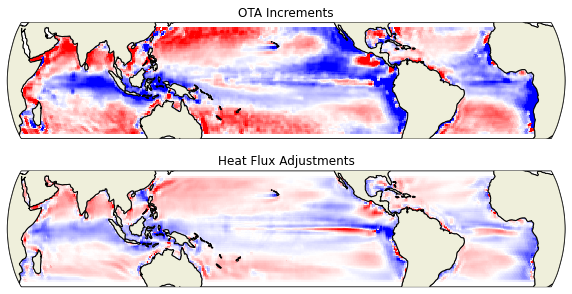

In [10]:
lats=slice(-30,30)
OTA=cycle_ave1.temp_increment.sel(yh=lats).isel(z_l=slice(0,5)).mean(('time','z_l')).load()*3600*24*365
OTA=OTA.where(static_ds.wet.sel(yh=lats))
FA=FA_ds.hflx_adj.sel(yh=lats).mean('time').load()
FA=FA.where(static_ds.wet.sel(yh=lats).data)
fig,axes=plt.subplots(2,1,figsize=[10,5],subplot_kw=dict(projection=ccrs.Robinson(210)))
axes[0].pcolormesh(geolon.sel(yh=lats),geolat.sel(yh=lats),
                   OTA,cmap='bwr',vmin=-20,vmax=20,transform=ccrs.PlateCarree())
axes[0].set_title('OTA Increments')
axes[1].pcolormesh(geolon.sel(yh=lats),geolat.sel(yh=lats),
                   FA,cmap='bwr',vmin=-100,vmax=100,transform=ccrs.PlateCarree())
axes[1].set_title('Heat Flux Adjustments')
for ax in axes:
    ax.coastlines()
    ax.add_feature(feature.LAND, zorder=100, edgecolor='k')

In [6]:
import scipy

np.correlate(FA[:],OTA[:])

ValueError: object too deep for desired array

/local2/home/miniconda3/envs/plot/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
<ipython-input-9-d4fb0b7cae45>:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


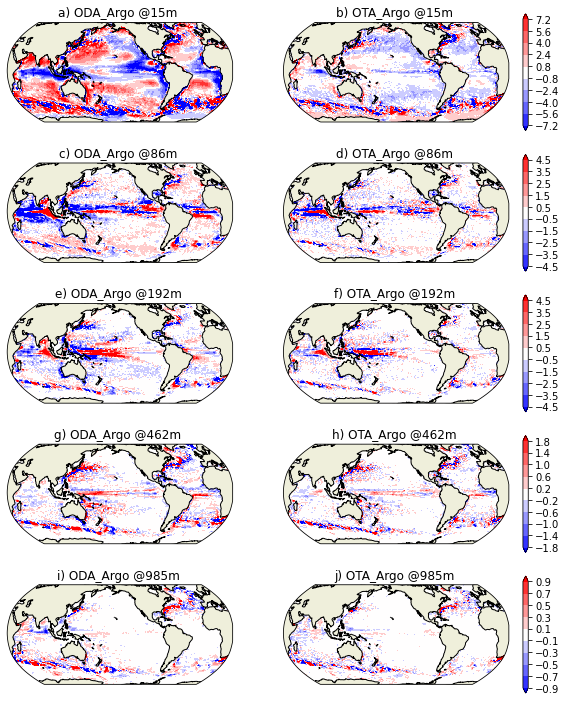

In [9]:
year1=2007
year2=2018
tslice=slice(str(year1)+'0101',str(year2)+'1231')
depths=[15,86,192,462,985]
clims=[x for x in [7.2,4.5,4.5,1.8,0.9]]
var='temp_increment'
for region in ['Global']:
# for region in ['Global','EqPacific','NorthAtlantic','SO1']:
    if region=='Global':
        lats=slice(-75,70)
        lons=slice(-300,60)
        PanelHeight=2.5
    elif region=='NorthAtlantic':
        lats=slice(20,70)
        lons=slice(-80,0)
        PanelHeight=2
    elif region=='EqPacific':
        lats=slice(-25,25)
        lons=slice(-240,-70)
        PanelHeight=1.5
    elif region=='EqAtlantic':
        lats=slice(-25,25)
        lons=slice(-80,20)
        PanelHeight=2
    elif region=='Kuroshio':
        lats=slice(20,60)
        lons=slice(-260,-180)
        PanelHeight=2
    elif region=='SO1':
        lats=slice(-70,-30)
        lons=slice(-240,-80)
        PanelHeight=1.5

    fig=plt.figure(figsize=(10,len(depths)*PanelHeight))
    fig_gs=gs.GridSpec(len(depths), ncols=2, width_ratios=[1,1.25])
    axes0 = [plt.subplot(fig_gs[i,0],projection=ccrs.Robinson(210)) for i in range(len(depths))]
    axes1 = [plt.subplot(fig_gs[i,1],projection=ccrs.Robinson(210)) for i in range(len(depths))]
    
    inc_slice1=inc_ave1.sel(time=tslice,yh=lats,xh=lons).sel(z_l=depths,method='nearest').mean('time')*86400*365
    inc_slice2=inc_ave2.sel(time=tslice,yh=lats,xh=lons).sel(z_l=depths,method='nearest').mean('time')*86400*365

    for i,depth,clim,ax,sfig in zip(range(0,len(depths)),depths,clims,axes0,['a) ','c) ','e) ','g) ','i) ']):
        cs=inc_slice2[var][i,:].plot(ax=ax,cmap='bwr',vmin=-clim,vmax=clim,levels=10,extend='both',
                                               transform=ccrs.PlateCarree(),add_colorbar=False) 
        ax.set_title(sfig+'ODA_Argo @'+str(depth)+'m ')
        ax.coastlines()
        ax.add_feature(feature.LAND)

    for i,depth,clim,ax,sfig in zip(range(0,len(depths)),depths,clims,axes1,['b) ','d) ','f) ','h) ','j) ']):
        cs=(inc_slice1[var][i,:]-
            inc_slice2[var][i,:]).plot(ax=ax,cmap='bwr',vmin=-clim,vmax=clim,levels=10,extend='both',
                                                 transform=ccrs.PlateCarree()) 
        cs.colorbar.set_label('')
        ax.set_title(sfig+'OTA_Argo @'+str(depth)+'m ')
        ax.coastlines()
        ax.add_feature(feature.LAND)

    fig.tight_layout()
    fig.savefig(output_dir+"/"+var+"_vs_"+expname2+"_"+region)
#     plt.close()

In [18]:
year1_s=2007
year1_e=2018
year2_s=2007
year2_e=2018
tslice1=slice(str(year1_s)+'0101',str(year1_e)+'1231')
tslice2=slice(str(year2_s)+'0101',str(year2_e)+'1231')
lats=slice(-90,90)
lons=slice(-300,60)
area_wt=area_t.sel(yh=lats,xh=lons)/area_t.sel(yh=lats,xh=lons).sum()

var_inc1='temp'
var_inc2='salt'
print(inc_ave1[var_inc1+"_increment"].sel(time=tslice1,yh=lats,xh=lons).shape)
print(inc_ave2[var_inc1+"_increment"].sel(time=tslice2,yh=lats,xh=lons).shape)

temp1=inc_ave1[var_inc1+"_increment"].sel(time=tslice1,yh=lats,xh=lons).mean('time')
temp2=inc_ave2[var_inc1+"_increment"].sel(time=tslice2,yh=lats,xh=lons).mean('time')

salt1=inc_ave1[var_inc2+"_increment"].sel(time=tslice1,yh=lats,xh=lons).mean('time')
salt2=inc_ave2[var_inc2+"_increment"].sel(time=tslice2,yh=lats,xh=lons).mean('time')

weighted_temp1=temp1*area_wt
sum_temp1=weighted_temp1.sum(('xh','yh'))*86400*365

weighted_temp2=temp2*area_wt
sum_temp2=weighted_temp2.sum(('xh','yh'))*86400*365

weighted_salt1=salt1*area_wt
sum_salt1=weighted_salt1.sum(('xh','yh'))*86400*365

weighted_salt2=salt2*area_wt
sum_salt2=weighted_salt2.sum(('xh','yh'))*86400*365

(1, 75, 320, 360)
(1, 75, 320, 360)


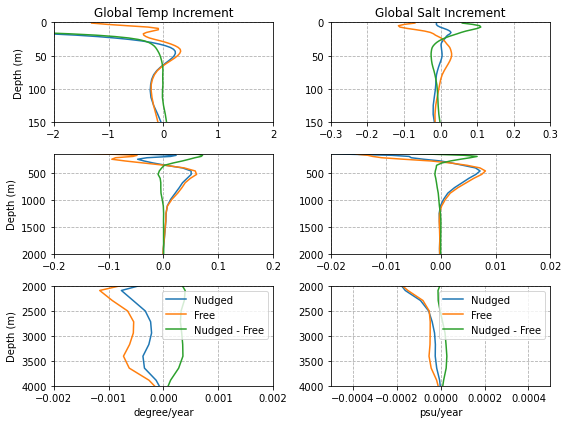

In [19]:
depth1=150
depth2=2000
# str1=expname1
# str2=expname2
# str3=expname1+'-'+expname2
str1='Nudged'
str2='Free'
str3='Nudged - Free'
fig, axes=plt.subplots(nrows=3, ncols=2, figsize=(8,6))

for i in range(0,3):
    sum_temp1.plot(ax=axes[i,0],y='z_l',yincrease=False,label=str1)
    sum_temp2.plot(ax=axes[i,0],y='z_l',yincrease=False,label=str2)
    (sum_temp1-sum_temp2).plot(ax=axes[i,0],y='z_l',yincrease=False,label=str3)

    sum_salt1.plot(ax=axes[i,1],y='z_l',yincrease=False,label=str1)
    sum_salt2.plot(ax=axes[i,1],y='z_l',yincrease=False,label=str2)
    (sum_salt1-sum_salt2).plot(ax=axes[i,1],y='z_l',yincrease=False,label=str3)

#     sum_temp2.plot(ax=axes[i,0],y='z_l',yincrease=False,label="OTA increments")
#     (sum_temp1-sum_temp2).plot(ax=axes[i,0],y='z_l',yincrease=False,label="Increments after OTA")

#     sum_salt2.plot(ax=axes[i,1],y='z_l',yincrease=False,label="OTA increments")
#     (sum_salt1-sum_salt2).plot(ax=axes[i,1],y='z_l',yincrease=False,label="Increments after OTA")
    
    axes[i,0].set_title('Global Temp Increment')
    axes[i,1].set_title('Global Salt Increment')

    axes[i,0].grid(linestyle='dashed')
    axes[i,1].grid(linestyle='dashed')

# axes[0,0].legend()
# axes[0,1].legend()
# axes[1,0].legend()
# axes[1,1].legend()
axes[2,0].legend()
axes[2,1].legend()
axes[0,0].set_xlim(-2e-0,2e-0)
axes[0,1].set_xlim(-3e-1,3e-1)
axes[1,0].set_xlim(-2e-1,2e-1)
axes[1,1].set_xlim(-2e-2,2e-2)
axes[2,0].set_xlim(-2e-3,2e-3)
axes[2,1].set_xlim(-0.5e-3,0.5e-3)

# axes[2,0].set_xticks([-5e-4,0,5e-4])
# axes[2,1].set_xticks([-1e-4,0,1e-4])

axes[0,0].set_ylim(depth1,0)
axes[0,1].set_ylim(depth1,0)
axes[1,0].set_ylim(depth2,depth1)
axes[1,1].set_ylim(depth2,depth1)
axes[2,0].set_ylim(4000,depth2)
axes[2,1].set_ylim(4000,depth2)

for ax in axes[:,0].flatten():
    ax.set_ylabel('Depth (m)')
for ax in axes[:,1].flatten():
    ax.set_ylabel('')
for ax in axes[1:,:].flatten():
    ax.set_title('')
    
axes[2,0].set_xlabel('degree/year')
axes[2,1].set_xlabel('psu/year')

fig.tight_layout()
fig.savefig(output_dir+'/'+expname1+'_'+str(year1_s)+'-'+str(year1_e)+'_vs_'+expname2+'_'+str(year2_s)+'-'+str(year2_e))
# plt.close()

In [5]:
year1_s=2007
year1_e=2018
year2_s=2007
year2_e=2018
tslice1=slice(str(year1_s)+'0101',str(year1_e)+'1231')
tslice2=slice(str(year2_s)+'0101',str(year2_e)+'1231')
lats=slice(10,20)
lons=slice(-85,-20)
area_wt=area_t.sel(yh=lats,xh=lons)/area_t.sel(yh=lats,xh=lons).sum()

var_inc1='temp'
var_inc2='salt'
print(cycle_ave1[var_inc1+"_increment"].sel(time=tslice1,yh=lats,xh=lons).shape)
print(cycle_ave2[var_inc1+"_increment"].sel(time=tslice2,yh=lats,xh=lons).shape)

temp1=cycle_ave1[var_inc1+"_increment"].sel(time=tslice1,yh=lats,xh=lons)
temp2=cycle_ave2[var_inc1+"_increment"].sel(time=tslice2,yh=lats,xh=lons)

salt1=cycle_ave1[var_inc2+"_increment"].sel(time=tslice1,yh=lats,xh=lons)
salt2=cycle_ave2[var_inc2+"_increment"].sel(time=tslice2,yh=lats,xh=lons)

ave_temp1=(temp1*area_wt).sum(('xh','yh'))*86400*365

ave_temp2=(temp2*area_wt).sum(('xh','yh'))*86400*365

ave_salt1=(salt1*area_wt).sum(('xh','yh'))*86400*365

ave_salt2=(salt2*area_wt).sum(('xh','yh'))*86400*365

(12, 75, 13, 65)
(12, 75, 13, 65)


<Figure size 864x432 with 0 Axes>

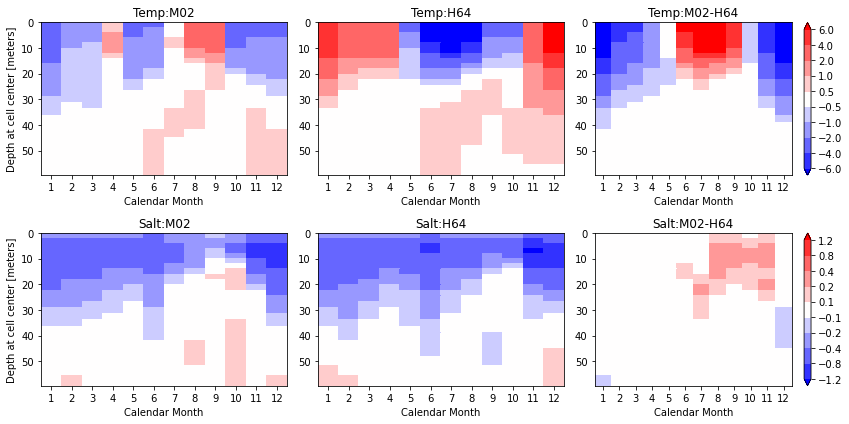

In [6]:
fig=plt.figure(figsize=(12,6))
# fig_gs=gs.GridSpec(2, 3, width_ratios=[1,1])
# axes0 = plt.subplot(fig_gs[0])
# axes1 = plt.subplot(fig_gs[1]) 
fig, axes=plt.subplots(nrows=2, ncols=3, figsize=(12,6))

levels=[-6,-4,-2,-1,-0.5,0.5,1,2,4,6]
cmap='bwr'
depths=slice(0,60)

ave_temp1.sel(z_l=depths).groupby('time.month').mean('time').T.\
        plot(ax=axes[0,0],cmap=cmap,yincrease=False,levels=levels,extend='both',add_colorbar=False)
ave_temp2.sel(z_l=depths).groupby('time.month').mean('time').T.\
        plot(ax=axes[0,1],cmap=cmap,yincrease=False,levels=levels,extend='both',add_colorbar=False)
(ave_temp1-ave_temp2).sel(z_l=depths).groupby('time.month').mean('time').T.\
        plot(ax=axes[0,2],cmap=cmap,yincrease=False,levels=levels,extend='both')

ave_salt1.sel(z_l=depths).groupby('time.month').mean('time').T.\
        plot(ax=axes[1,0],cmap=cmap,yincrease=False,levels=[l/5 for l in levels],extend='both',add_colorbar=False)
ave_salt2.sel(z_l=depths).groupby('time.month').mean('time').T.\
        plot(ax=axes[1,1],cmap=cmap,yincrease=False,levels=[l/5 for l in levels],extend='both',add_colorbar=False)
(ave_salt1-ave_salt2).sel(z_l=depths).groupby('time.month').mean('time').T.\
        plot(ax=axes[1,2],cmap=cmap,yincrease=False,levels=[l/5 for l in levels],extend='both')

for ax in axes[:,1:3].flat:
    ax.set_ylabel('')

for ax in axes.flat:
    ax.set_xlabel('Calendar Month')
    ax.set_xticks(np.arange(1,13))
    ax.set_xticklabels(np.arange(1,13))    

for ax,var in zip([axes[0,:],axes[1,:]],['Temp','Salt']):
    ax[0].set_title(var+':'+expname1)
    ax[1].set_title(var+':'+expname2)
    ax[2].set_title(var+':'+expname1+'-'+expname2)

fig.tight_layout()
fig.savefig(output_dir+'/annual_cycle_MDR_'+expname1+'_vs_'+expname2)

In [9]:
year1_s=2007
year1_e=2018
year2_s=2007
year2_e=2018
tslice1=slice(str(year1_s)+'0101',str(year1_e)+'1231')
tslice2=slice(str(year2_s)+'0101',str(year2_e)+'1231')
lats=slice(-90,90)
lons=slice(-300,60)
area_wt=area_t.sel(yh=lats,xh=lons)/area_t.sel(yh=lats,xh=lons).sum()

var_inc1='temp'
var_inc2='salt'
print(inc_ave1[var_inc1+"_increment"].sel(time=tslice1,yh=lats,xh=lons).shape)
print(inc_ave2[var_inc1+"_increment"].sel(time=tslice2,yh=lats,xh=lons).shape)

temp1=inc_ave1[var_inc1+"_increment"].sel(time=tslice1,yh=lats,xh=lons).mean('time')
temp2=inc_ave2[var_inc1+"_increment"].sel(time=tslice2,yh=lats,xh=lons).mean('time')

salt1=inc_ave1[var_inc2+"_increment"].sel(time=tslice1,yh=lats,xh=lons).mean('time')
salt2=inc_ave2[var_inc2+"_increment"].sel(time=tslice2,yh=lats,xh=lons).mean('time')

# ave_temp1=((temp1-temp2)*area_wt).sum(('xh','yh'))
# ave_abs_temp1=np.abs(ave_temp1)*86400*365
abs_temp1=np.abs(temp1-temp2)
abs_ave_temp1=(abs_temp1*area_wt).sum(('xh','yh'))*86400*365

# ave_temp2=(temp2*area_wt).sum(('xh','yh'))
# ave_abs_temp2=np.abs(ave_temp2)*86400*365
abs_temp2=np.abs(temp2)
abs_ave_temp2=(abs_temp2*area_wt).sum(('xh','yh'))*86400*365

# ave_salt1=((salt1-salt2)*area_wt).sum(('xh','yh'))
# ave_abs_salt1=np.abs(ave_salt1)*86400*365
abs_salt1=np.abs(salt1-salt2)
abs_ave_salt1=(abs_salt1*area_wt).sum(('xh','yh'))*86400*365

# ave_salt2=(salt2*area_wt).sum(('xh','yh'))
# ave_abs_salt2=np.abs(ave_salt2)*86400*365
abs_salt2=np.abs(salt2)
abs_ave_salt2=(abs_salt2*area_wt).sum(('xh','yh'))*86400*365

# print((sum_temp1/sum_temp2))
# print((sum_salt1/sum_salt2))

(12, 75, 320, 360)
(12, 75, 320, 360)


/local2/home/miniconda3/envs/plot/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


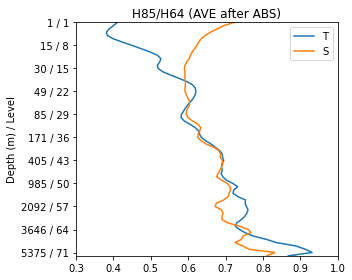

In [14]:
fig,axes=plt.subplots(nrows=1, ncols=1,figsize=(5,4))
    
# ha=ax.pcolormesh((sum_temp1/sum_temp2).groupby('time.month').mean('time').T,cmap='bwr',vmin=0.25,vmax=1.75)
# axes[0].plot(ave_abs_temp1/ave_abs_temp2,range(0,len(ave_abs_temp1.z_l)),label='T')
# axes[0].plot(ave_abs_salt1/ave_abs_salt2,range(0,len(ave_abs_temp1.z_l)),label='S')
# axes[0].set_xlim(0,1)
ylim=71
ytick_start=0
ytick_step=7
# print(np.arange(ytick_start,ylim,ytick_step))
# axes[0].set_ylim(ylim,0)
# axes[0].set_yticks(np.arange(ytick_start,ylim,ytick_step))
# axes[0].set_yticklabels([str(int(ave_abs_temp1.z_l[i].values))+' / '+str(i+1) 
#                          for i in np.arange(ytick_start,ylim,ytick_step)])
# axes[0].set_ylabel('Depth (m) / Level')
# axes[0].set_title(expname1+'/'+expname2+' (ABS after AVE)')
# axes[0].legend()

# ha=ax.pcolormesh((sum_temp1/sum_temp2).groupby('time.month').mean('time').T,cmap='bwr',vmin=0.25,vmax=1.75)
axes.plot(abs_ave_temp1/abs_ave_temp2,range(0,len(abs_ave_temp1.z_l)),label='T')
axes.plot(abs_ave_salt1/abs_ave_salt2,range(0,len(abs_ave_temp1.z_l)),label='S')
axes.set_xlim(0.3,1.0)
axes.set_ylim(ylim,0)
axes.set_yticks(np.arange(ytick_start,ylim,ytick_step))
axes.set_yticklabels([str(int(abs_ave_temp1.z_l[i].values))+' / '+str(i+1) 
                         for i in np.arange(ytick_start,ylim,ytick_step)])
axes.set_ylabel('Depth (m) / Level')
axes.set_title(expname1+'/'+expname2+' (AVE after ABS)')
axes.legend()

fig.tight_layout()
fig.savefig(output_dir+'/clm_absolute_ratio_'+expname1+'_vs_'+expname2)

In [12]:
year1_s=2007
year1_e=2018
year2_s=2007
year2_e=2018
tslice1=slice(str(year1_s)+'0101',str(year1_e)+'1231')
tslice2=slice(str(year2_s)+'0101',str(year2_e)+'1231')
lats=slice(-90,90)
lons=slice(-300,60)
area_wt=area_t.sel(yh=lats,xh=lons)/area_t.sel(yh=lats,xh=lons).sum()

var_inc1='temp'
var_inc2='salt'
print(cycle_ave1[var_inc1+"_increment"].sel(time=tslice1,yh=lats,xh=lons).shape)
print(cycle_ave2[var_inc1+"_increment"].sel(time=tslice2,yh=lats,xh=lons).shape)

temp1=cycle_ave1[var_inc1+"_increment"].sel(time=tslice1,yh=lats,xh=lons)
temp2=cycle_ave2[var_inc1+"_increment"].sel(time=tslice2,yh=lats,xh=lons)

salt1=cycle_ave1[var_inc2+"_increment"].sel(time=tslice1,yh=lats,xh=lons)
salt2=cycle_ave2[var_inc2+"_increment"].sel(time=tslice2,yh=lats,xh=lons)

abs_temp1=np.abs(temp1)
abs_ave_temp1=(abs_temp1*area_wt).sum(('xh','yh'))*86400*365

abs_temp2=np.abs(temp2)
abs_ave_temp2=(abs_temp2*area_wt).sum(('xh','yh'))*86400*365

abs_salt1=np.abs(salt1)
abs_ave_salt1=(abs_salt1*area_wt).sum(('xh','yh'))*86400*365

abs_salt2=np.abs(salt2)
abs_ave_salt2=(abs_salt2*area_wt).sum(('xh','yh'))*86400*365

(12, 75, 320, 360)
(12, 75, 320, 360)


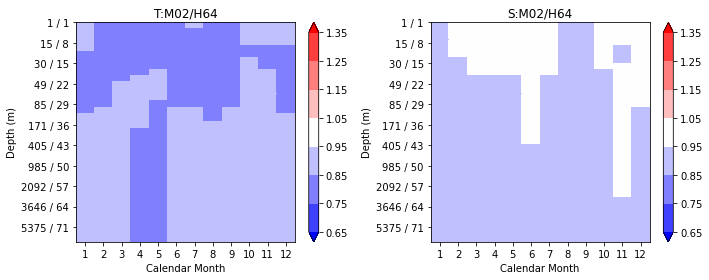

In [13]:
fig=plt.figure(figsize=(10,4))
fig_gs=gs.GridSpec(1, 2, width_ratios=[1,1])
axes0 = plt.subplot(fig_gs[0])
axes1 = plt.subplot(fig_gs[1]) 

levels=np.arange(0.65,1.4,0.1)
cmap='bwr'
temp_ratio=(abs_ave_temp1/abs_ave_temp2).groupby('time.month').mean('time').T
salt_ratio=(abs_ave_salt1/abs_ave_salt2).groupby('time.month').mean('time').T
temp_ratio.plot(ax=axes0,cmap=cmap,levels=levels,extend='both')
salt_ratio.plot(ax=axes1,cmap=cmap,levels=levels,extend='both')
axes0.set_ylabel('Depth (m)')
axes1.set_ylabel('Depth (m)')

ylim=75
ytick_start=0
ytick_step=7
for ax in [axes0,axes1]:
    ax.set_xlabel('Calendar Month')
    ax.set_xticks(np.arange(1,13))
    ax.set_xticklabels(np.arange(1,13))    
    ax.set_ylim(ylim,0)
    ax.set_yticks(np.arange(ytick_start,ylim,ytick_step))
    ax.set_yticklabels([str(int(abs_ave_temp1.z_l[i].values))+' / '+str(i+1) 
                        for i in np.arange(ytick_start,ylim,ytick_step)])

axes0.set_title('T:'+expname1+'/'+expname2)
axes1.set_title('S:'+expname1+'/'+expname2)
fig.tight_layout()
fig.savefig(output_dir+'/annual_cycle_absolute_ratio_'+expname1+'_vs_'+expname2)

In [10]:
# period=slice('20000801','20001031')
period=slice('19990101','20031231')
lat=0
lon=-95
depths=slice(0,1200)
clim=1E-6
level_base=[-32,-16,-8,-4,-2,-1,-0.5,-0.25,0.25,0.5,1,2,4,8,16,32]
clevels=[clim*lvl for lvl in level_base]
cmap='bwr'

var='temp'
inc_files=glob.glob(output_dir+'/'+var+'_inc_lat0_lon95.nc')
print(inc_files)
inc_ds=xr.open_mfdataset(inc_files,combine='by_coords')

inc_name=var+'_increment'
inc_var=inc_ds[inc_name]
print(inc_var)

inc_slice=inc_var.sel(time=period).sel(yh=lat,xh=lon,method='nearest').sel(z_l=depths)
print(inc_slice.shape)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,5))
inc_slice.plot(ax=ax,x='time',levels=clevels,cmap=cmap,extend='both',yincrease=False)
plt.title(exp_name+' '+ax.get_title())
fig.tight_layout()
plt.savefig(output_dir+'/'+inc_name+'_'+'lat'+str(lat)+'_lon'+str(lon)+'.jpg')
               
#     nbins=21
#     clims=[cl/10 for cl in clims]
#     fig, axes=plt.subplots(nrows=2, ncols=3, figsize=(10,PanelHeight*2), 
#                            subplot_kw={'projection': ccrs.Robinson((lons.start+lons.stop)/2)})
#     mean_slice=mean_var.sel(yh=lats,xh=lons).sel(z_l=depths,method='nearest')
#     for d,ax,clim in zip(mean_slice.z_l,axes.flat,clims):
#         levels = MaxNLocator(nbins=nbins).tick_values(-clim, clim)
#         cm = plt.get_cmap('bwr')
#         norm = BoundaryNorm(levels, ncolors=cm.N)
#         cs=ax.pcolormesh(geolon.sel(yh=lats,xh=lons),geolat.sel(yh=lats,xh=lons),mean_slice.sel(z_l=d),
#                          norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#         fig.colorbar(cs, ax=ax)
#         ax.coastlines()
#         ax.set_title(str(int(d.values))+' meters')

#     plt.savefig(output_dir+"/"+var+'_'+region+'.jpg')

['/home/Feiyu.Lu/Documents/SPEAR_ECDA/increments/J11_rerun/temp_inc_lat0_lon95.nc']
<xarray.DataArray 'temp_increment' (time: 1826, z_l: 75, yh: 1, xh: 1)>
dask.array<open_dataset-f6fcb4ecd265b6f6fb435814c6f8363ftemp_increment, shape=(1826, 75, 1, 1), dtype=float32, chunksize=(1826, 75, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1999-01-01 12:00:00 ... 2003-12-31 12:00:00
  * xh       (xh) float64 -94.5
  * yh       (yh) float64 -0.0
  * z_l      (z_l) float64 1.0 3.0 5.0 7.0 ... 5.875e+03 6.125e+03 6.375e+03
Attributes:
    long_name:      ocean potential temperature increments
    units:          degC
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  area: area_t
    time_avg_info:  average_T1,average_T2,average_DT
(1826, 51)


['/archive/Feiyu.Lu/SPEAR/SPEAR_c96_o1_ECDA_J11_rerun_noPIRATA/pp_ensemble/ocean_z/ts/monthly/1yr/ocean_z.200001-200012.thetao.nc', '/archive/Feiyu.Lu/SPEAR/SPEAR_c96_o1_ECDA_J11_rerun_noPIRATA/pp_ensemble/ocean_z/ts/monthly/1yr/ocean_z.199901-199912.thetao.nc', '/archive/Feiyu.Lu/SPEAR/SPEAR_c96_o1_ECDA_J11_rerun_noPIRATA/pp_ensemble/ocean_z/ts/monthly/1yr/ocean_z.200101-200112.thetao.nc', '/archive/Feiyu.Lu/SPEAR/SPEAR_c96_o1_ECDA_J11_rerun_noPIRATA/pp_ensemble/ocean_z/ts/monthly/1yr/ocean_z.200301-200312.thetao.nc', '/archive/Feiyu.Lu/SPEAR/SPEAR_c96_o1_ECDA_J11_rerun_noPIRATA/pp_ensemble/ocean_z/ts/monthly/1yr/ocean_z.200201-200212.thetao.nc']
(60, 75, 320, 360)
(60, 50)


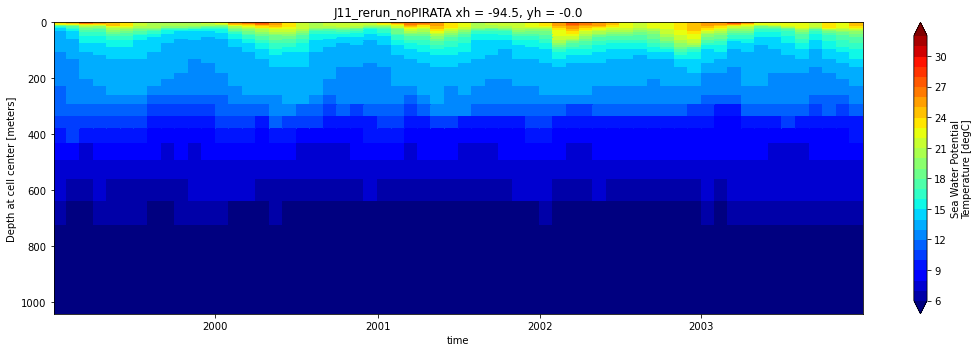

In [7]:
inc_files=glob.glob(ecda_dir+'/pp_ensemble/ocean_z/ts/monthly/1yr/ocean_z.*.thetao.nc')
print(inc_files)
inc_ds=xr.open_mfdataset(inc_files,combine='by_coords')

inc_name="thetao"
inc_var=inc_ds[inc_name]
print(inc_var.shape)

period=slice('19990101','20031231')
lat=0
lon=-95
depths=slice(0,1000)
inc_slice=inc_var.sel(time=period).sel(yh=lat,xh=lon,method='nearest').sel(z_l=depths)
print(inc_slice.shape)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,5))
inc_slice.plot(ax=ax,x='time',cmap='jet',levels=27,vmin=6,vmax=32,extend='both',yincrease=False)
plt.title(exp_name+' '+ax.get_title())
fig.tight_layout()
plt.savefig(output_dir+'/'+inc_name+'_'+'lat'+str(lat)+'_lon'+str(lon)+'.jpg')
               
#     nbins=21
#     clims=[cl/10 for cl in clims]
#     fig, axes=plt.subplots(nrows=2, ncols=3, figsize=(10,PanelHeight*2), 
#                            subplot_kw={'projection': ccrs.Robinson((lons.start+lons.stop)/2)})
#     mean_slice=mean_var.sel(yh=lats,xh=lons).sel(z_l=depths,method='nearest')
#     for d,ax,clim in zip(mean_slice.z_l,axes.flat,clims):
#         levels = MaxNLocator(nbins=nbins).tick_values(-clim, clim)
#         cm = plt.get_cmap('bwr')
#         norm = BoundaryNorm(levels, ncolors=cm.N)
#         cs=ax.pcolormesh(geolon.sel(yh=lats,xh=lons),geolat.sel(yh=lats,xh=lons),mean_slice.sel(z_l=d),
#                          norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#         fig.colorbar(cs, ax=ax)
#         ax.coastlines()
#         ax.set_title(str(int(d.values))+' meters')
        
#     fig.tight_layout()
#     plt.savefig(output_dir+"/"+var+'_'+region+'.jpg')

In [6]:
slice1=inc_slice

In [9]:
slice2=inc_slice

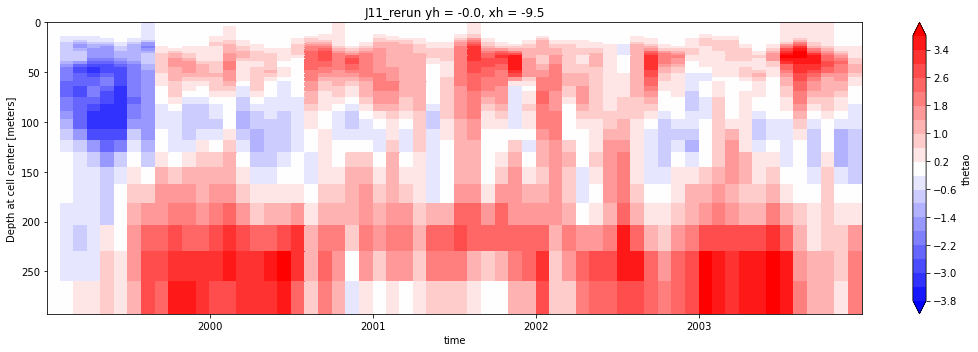

In [14]:
fig1, ax1=plt.subplots(nrows=1, ncols=1, figsize=(15,5))
(slice2-slice1).plot(ax=ax1,x='time',cmap='bwr',levels=20,vmin=-3.8,vmax=3.8,extend='both',yincrease=False)
plt.title(exp_name+' '+ax1.get_title())
fig1.tight_layout()
# plt.savefig(output_dir+'/'+inc_name+'_'+'lat'+str(lat)+'_lon'+str(lon)+'.jpg')

<xarray.Dataset>
Dimensions:  (depth: 11, lat: 12, lon: 9, time: 367)
Coordinates:
  * lon      (lon) float32 322.0 325.0 326.0 328.0 330.0 337.0 350.0 360.0 368.0
  * lat      (lat) float32 -10.0 -8.0 -6.0 -2.0 0.0 ... 8.0 12.0 15.0 20.0 21.0
  * depth    (depth) float32 1.0 20.0 40.0 60.0 80.0 ... 140.0 180.0 300.0 500.0
  * time     (time) datetime64[ns] 2002-12-31T12:00:00 ... 2004-01-01T12:00:00
Data variables:
    T_20     (lon, lat, depth, time) float32 ...
    QT_5020  (lon, lat, depth, time) float32 ...
    ST_6020  (lon, lat, depth, time) float32 ...
Attributes:
    array:                        PIRATA
    Data_Source:                  GTMBA Project Office/NOAA/PMEL
    Data_info:                    Contact Paul Freitag: 206-526-6727
    File_info:                    Contact Dai McClurg: Dai.C.McClurg@noaa.gov
    Request_for_acknowledgement:  If you use these data in publications or pr...
    missing_value:                1e+35
    _FillValue:                   1e+35


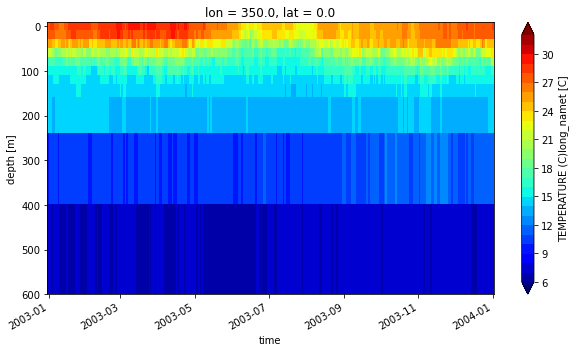

In [6]:
pmel_ds=xr.open_dataset('/work/Feiyu.Lu/ECDA_data/PMEL/T_at2003.nc')
print(pmel_ds)
pmel_slice=pmel_ds.T_20.sel(lon=350,lat=0,method='nearest')

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,5))
pmel_slice.plot(ax=ax,x='time',cmap='jet',levels=27,vmin=6,vmax=32,extend='both',yincrease=False)
# plt.title(exp_name+' '+ax1.get_title())
# fig1.tight_layout()